In [ ]:
import torch
import pandas as pd
import numpy as np

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


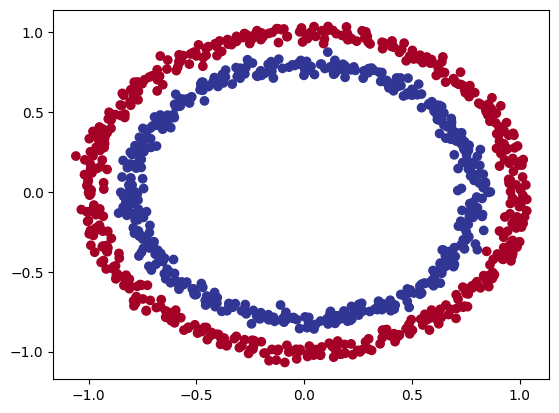

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and for y: 1
Shapes for one sample of X: (2,) and for y: ()


### Turn data into tensors and create train test splits

In [ ]:
torch.__version__

'2.6.0+cu124'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

### Building a model
Building a model to classify the blue and red dots.

1. Setup device agnostic code
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop.

In [ ]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Creating a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass(or forward computation) of the model.
4. Instantiate an instance of our model class and set it to the target `device`.

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # layer that takes in 2 features and upscales to 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # layer that takes in 5 features from previous layer and outputs 1 feature (same shape as y)

    # 3. Define a forward() that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of the model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# # 1. Construct a model that subclasses nn.Module
# class CircleModelV0(nn.Module):
#   def __init__(self) -> None:
#     super().__init__()
#     # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
#     # self.layer_1 = nn.Linear(in_features=2, out_features=5) # layer that takes in 2 features and upscales to 5
#     # self.layer_2 = nn.Linear(in_features=5, out_features=1) # layer that takes in 5 features from previous layer and outputs 1 feature (same shape as y)

#     self.two_linear_layers = nn.Sequential(
#         nn.Linear(in_features=2, out_features=5),
#         nn.Linear(in_features=5, out_features=1)
#     )

#     # 3. Define a forward() that outlines the forward pass
#   def forward(self,x):
#     # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
#     return self.two_linear_layers(x)

# # 4. Instantiate an instance of the model class and send it to the target device
# model_0 = CircleModelV0().to(device)
# model_0

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Replicating the model using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2442, -0.1581],
                      [ 0.3408, -0.1929],
                      [ 0.3311, -0.1545],
                      [-0.4796,  0.2878],
                      [ 0.1084,  0.3153]])),
             ('0.bias', tensor([ 0.7025,  0.4828,  0.6703,  0.0378, -0.6083])),
             ('1.weight',
              tensor([[-0.3137, -0.2778, -0.3941, -0.2242, -0.4117]])),
             ('1.bias', tensor([-0.4126]))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test)
print(f"Length of prredictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of prredictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[-0.7778],
        [-0.8197],
        [-0.7196],
        [-0.7941],
        [-0.8014],
        [-0.8263],
        [-0.8793],
        [-0.8811],
        [-0.7163],
        [-0.8234]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### Setup loss function and optimizer
- In this classification case, the loss function used is `torch.nn.BCEWithLogitsLoss()`

In [ ]:
# Setup the loss functions
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function already built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
# Calculate the accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred)
  acc = (correct.sum().item()/len(y_pred)) * 100   # .sum() counts the True values by treating them as 1, the number is a scalar tensor, .item() method extracts this number as a regular Python scalar, making it easy to be used in callculations
  return acc

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.2442, -0.1581],
         [ 0.3408, -0.1929],
         [ 0.3311, -0.1545],
         [-0.4796,  0.2878],
         [ 0.1084,  0.3153]], requires_grad=True),
 Parameter containing:
 tensor([ 0.7025,  0.4828,  0.6703,  0.0378, -0.6083], requires_grad=True),
 Parameter containing:
 tensor([[-0.3137, -0.2778, -0.3941, -0.2242, -0.4117]], requires_grad=True),
 Parameter containing:
 tensor([-0.4126], requires_grad=True)]

### **Train the model**
Building a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Backpropagation (loss backward)
5. Optimizer step (gradient descent)

***Going from raw logits -> prediction probabilities -> prediction labels***

The model outputs are going to be raw **logits**.

Hence, converting these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then converting the model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.7778],
        [-0.8197],
        [-0.7196],
        [-0.7941],
        [-0.8014]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3148],
        [0.3058],
        [0.3275],
        [0.3113],
        [0.3097]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

#### Building the training and testing loop

In [ ]:
# Set the random seed for reproducibility
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilties as input
  #                y_train)
  loss = loss_fn(y_logits,   # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)    # predictions first, then truth labels
  train_acc = accuracy_fn(y_true=y_train,  # y_true, y_pred in that order...
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss Backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what is happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train Loss: {loss:.5f}, Train Accuracy: {train_acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Train Loss: 0.76968, Train Accuracy: 50.00% | Test Loss: 0.76729, Test Accuracy: 50.00%
Epoch: 100 | Train Loss: 0.71232, Train Accuracy: 50.00% | Test Loss: 0.70964, Test Accuracy: 50.00%
Epoch: 200 | Train Loss: 0.69902, Train Accuracy: 50.00% | Test Loss: 0.69578, Test Accuracy: 50.00%
Epoch: 300 | Train Loss: 0.69586, Train Accuracy: 44.12% | Test Loss: 0.69239, Test Accuracy: 44.00%
Epoch: 400 | Train Loss: 0.69499, Train Accuracy: 47.50% | Test Loss: 0.69154, Test Accuracy: 51.00%
Epoch: 500 | Train Loss: 0.69465, Train Accuracy: 47.75% | Test Loss: 0.69135, Test Accuracy: 53.00%
Epoch: 600 | Train Loss: 0.69445, Train Accuracy: 48.38% | Test Loss: 0.69135, Test Accuracy: 53.00%
Epoch: 700 | Train Loss: 0.69428, Train Accuracy: 49.00% | Test Loss: 0.69141, Test Accuracy: 53.00%
Epoch: 800 | Train Loss: 0.69415, Train Accuracy: 48.38% | Test Loss: 0.69150, Test Accuracy: 53.00%
Epoch: 900 | Train Loss: 0.69403, Train Accuracy: 48.62% | Test Loss: 0.69160, Test Accuracy:

### Make predictions and evaluate the model
- Importing a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from a repo
if Path('helper_fucntions.py').is_file():
  print('helper_functions.py already exists, skipping downlaod')
else:
  print('Downloading helper_functions.py...')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

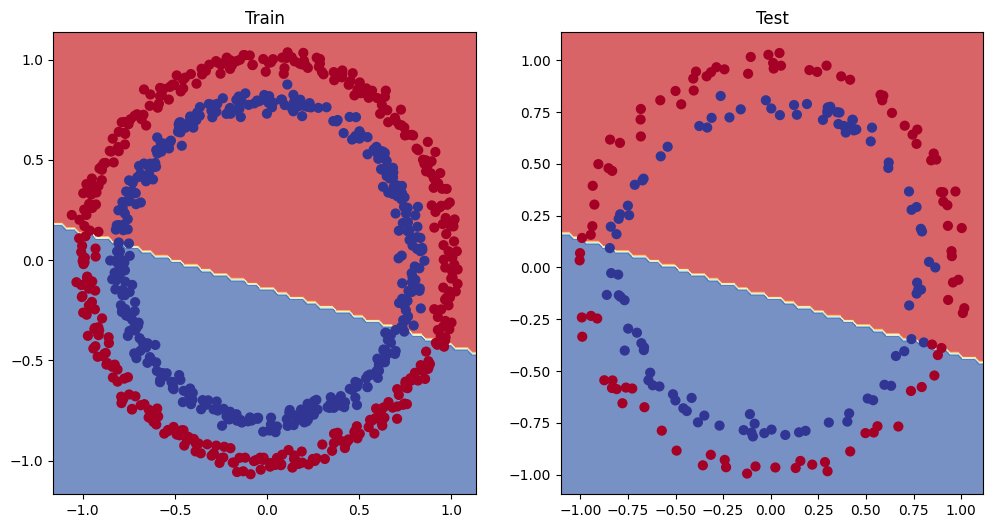

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model (from a model's perspective)
* Add more layers
* Add more hidden units - from 5 to 10
* Fit for more epochs
* Changing the activation functions
* Change the learning rate
* Change the loss function

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2549, -0.1838],
                      [ 0.3302, -0.2186],
                      [ 0.3161, -0.1908],
                      [-0.4924,  0.2553],
                      [ 0.0768,  0.2332]])),
             ('0.bias', tensor([ 0.6388,  0.4224,  0.5843, -0.0252, -0.7491])),
             ('1.weight',
              tensor([[-0.1648, -0.1613, -0.2241, -0.2104, -0.5566]])),
             ('1.bias', tensor([-0.1287]))])

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)

# Train longer
epochs = 1000

# Put data on device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Print what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Training Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Training Accuracy: 50.88% | Test loss: 0.69261, Test Accuracy: 51.00%
Epoch: 100 | Loss: 0.69305, Training Accuracy: 50.38% | Test loss: 0.69379, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.69299, Training Accuracy: 51.12% | Test loss: 0.69437, Test Accuracy: 46.00%
Epoch: 300 | Loss: 0.69298, Training Accuracy: 51.62% | Test loss: 0.69458, Test Accuracy: 45.00%
Epoch: 400 | Loss: 0.69298, Training Accuracy: 51.12% | Test loss: 0.69465, Test Accuracy: 46.00%
Epoch: 500 | Loss: 0.69298, Training Accuracy: 51.00% | Test loss: 0.69467, Test Accuracy: 46.00%
Epoch: 600 | Loss: 0.69298, Training Accuracy: 51.00% | Test loss: 0.69468, Test Accuracy: 46.00%
Epoch: 700 | Loss: 0.69298, Training Accuracy: 51.00% | Test loss: 0.69468, Test Accuracy: 46.00%
Epoch: 800 | Loss: 0.69298, Training Accuracy: 51.00% | Test loss: 0.69468, Test Accuracy: 46.00%
Epoch: 900 | Loss: 0.69298, Training Accuracy: 51.00% | Test loss: 0.69468, Test Accuracy: 46.00%


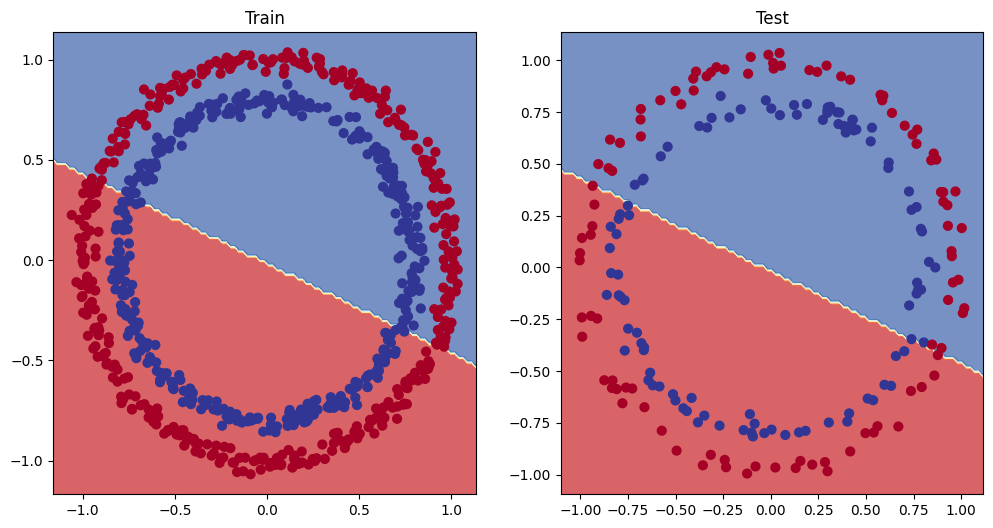

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if the model can fit a straight line
One way to troubleshoot a larger problem is to test out a smaller problem.

In [ ]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias  # Linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Check train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

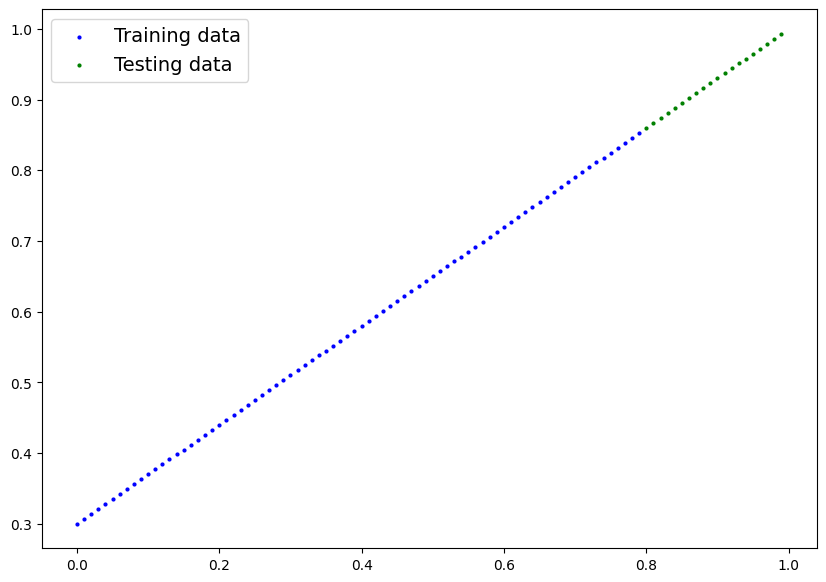

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and opitimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs = 10000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  # Training
  # model_2.train()
  y_pred = model_2(X_train_regression)
  # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 1000 | Loss: 0.01782 | Test Loss: 0.00333
Epoch: 2000 | Loss: 0.01460 | Test Loss: 0.00257
Epoch: 3000 | Loss: 0.01317 | Test Loss: 0.00209
Epoch: 4000 | Loss: 0.01195 | Test Loss: 0.00214
Epoch: 5000 | Loss: 0.01166 | Test Loss: 0.00208
Epoch: 6000 | Loss: 0.01062 | Test Loss: 0.00149
Epoch: 7000 | Loss: 0.01055 | Test Loss: 0.00196
Epoch: 8000 | Loss: 0.01005 | Test Loss: 0.00213
Epoch: 9000 | Loss: 0.00958 | Test Loss: 0.00177


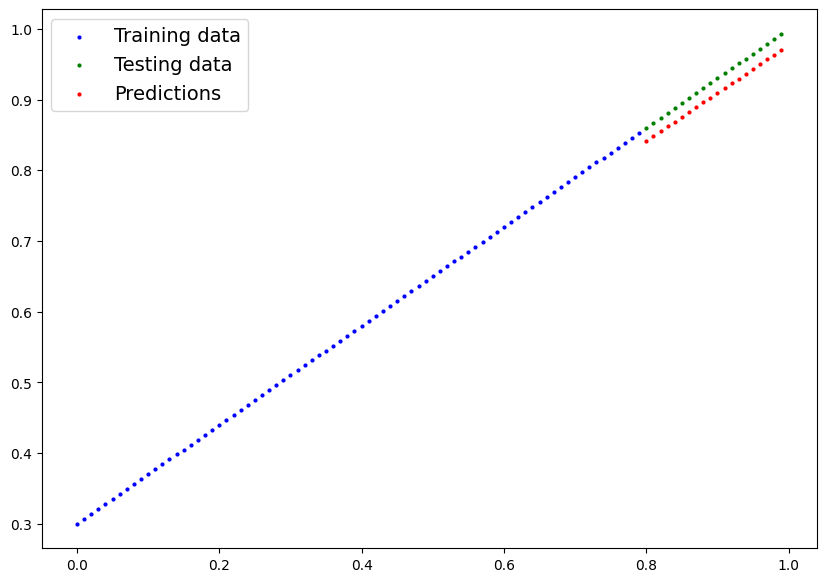

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## **Non-Linearity**

### Recreating non-linear data (red and blue circles)

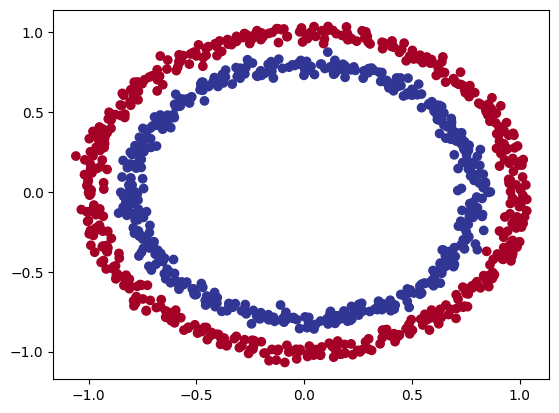

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_smaples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and then to train test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### **Building a model with non-linearity**
- Artificial neural networks are large combination of linear and non-linear functions which are properly able to find patterns of data.

In [ ]:
# Build a model wiht non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()  # relu is a non-linear activation function
    # self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### Training a model with non-linearity

In [ ]:
# Radom seed
torch.manual_seed(42)

# Put all data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 10000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss & accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Gradient descent (step the optimizer)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.6929, Accuracy: 50.00% | Test loss: 0.6932, Test Accuracy: 50.00%
Epoch: 1000 | Loss: 0.5682, Accuracy: 87.75% | Test loss: 0.5738, Test Accuracy: 86.50%
Epoch: 2000 | Loss: 0.0418, Accuracy: 99.88% | Test loss: 0.0658, Test Accuracy: 100.00%
Epoch: 3000 | Loss: 0.0167, Accuracy: 99.88% | Test loss: 0.0336, Test Accuracy: 100.00%
Epoch: 4000 | Loss: 0.0105, Accuracy: 100.00% | Test loss: 0.0245, Test Accuracy: 99.50%
Epoch: 5000 | Loss: 0.0077, Accuracy: 100.00% | Test loss: 0.0199, Test Accuracy: 99.50%
Epoch: 6000 | Loss: 0.0060, Accuracy: 100.00% | Test loss: 0.0173, Test Accuracy: 99.50%
Epoch: 7000 | Loss: 0.0050, Accuracy: 100.00% | Test loss: 0.0156, Test Accuracy: 99.50%
Epoch: 8000 | Loss: 0.0043, Accuracy: 100.00% | Test loss: 0.0145, Test Accuracy: 99.50%
Epoch: 9000 | Loss: 0.0037, Accuracy: 100.00% | Test loss: 0.0137, Test Accuracy: 99.50%


### Evaluating a model with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

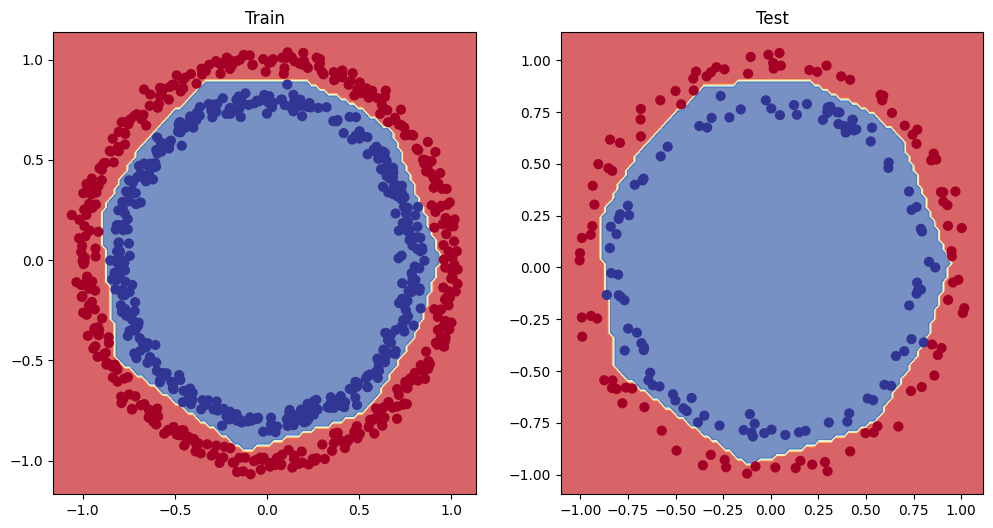

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9036,  1.5960],
                      [-0.7052,  2.7153],
                      [-0.1549,  0.1427],
                      [-3.0099, -0.3671],
                      [ 0.8623, -2.9784],
                      [ 1.7082, -0.0545],
                      [ 2.3630,  0.5450],
                      [ 0.3410, -0.0998],
                      [ 0.5872,  0.8908],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.2418, -1.2439, -0.2872, -0.6927, -0.7581, -0.8380, -0.9570, -0.4252,
                      -0.1943, -0.6984])),
             ('layer_2.weight',
              tensor([[-0.0179, -0.9311,  0.2441, -0.4759, -0.5108, -0.1861, -0.4244,  0.2555,
                       -0.0917, -0.0997],
                      [ 1.6224,  2.6898,  0.1331,  2.8226,  2.7405,  1.5594,  2.2915,  0.0566,
                        0.9245, -0.1927],
                      [-0.3130, -0.1244, -0.2426,  0.1545,  0.0910,  0.1

### Replicating non-linear activation functions


In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.type()

'torch.FloatTensor'

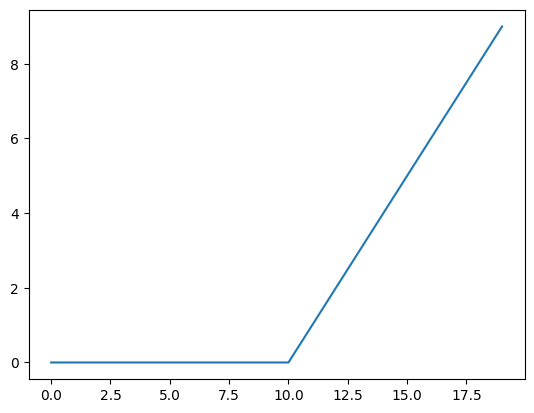

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [ ]:
# for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

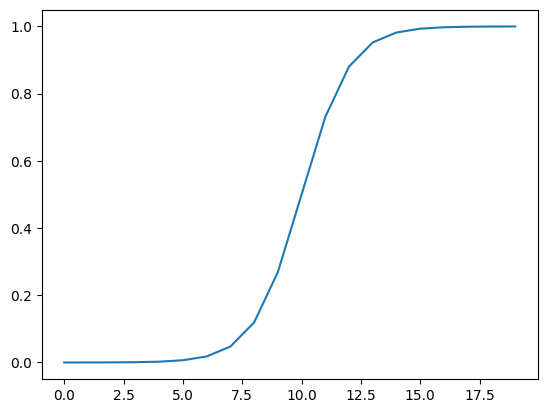

In [ ]:
plt.plot(torch.sigmoid(A));

In [ ]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

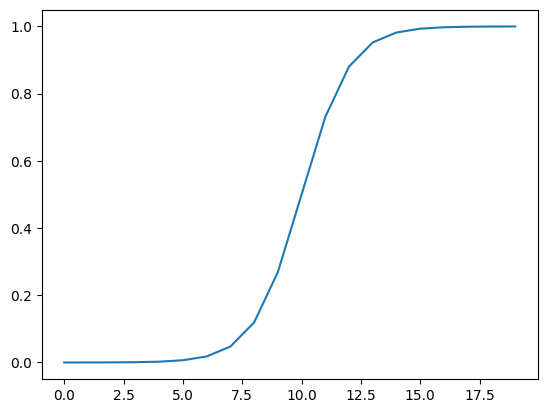

In [ ]:
plt.plot(sigmoid(A));

## **A multiclass classification problem**

### Creating a toy multi-class dataset

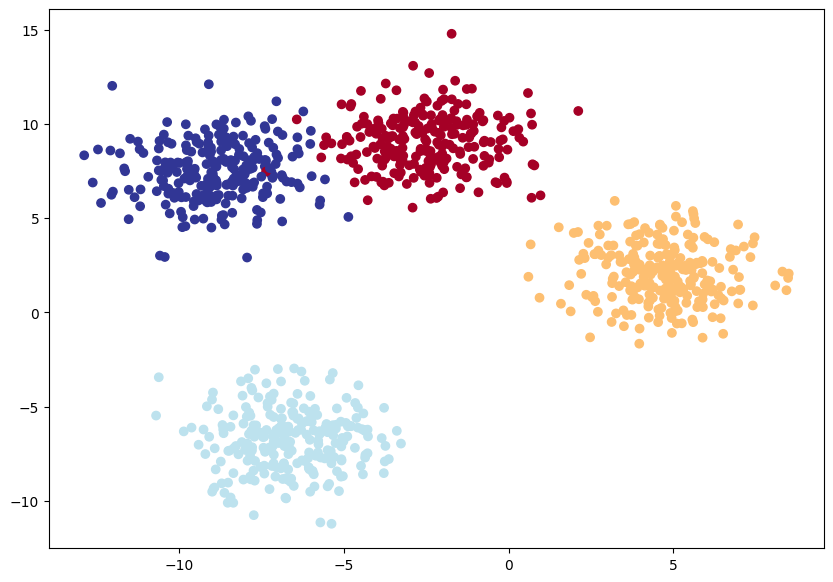

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hypaparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the cluster a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split data into tensors
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
X_blob[:10]

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815],
        [-6.7941, -6.4772],
        [ 5.2102,  2.8890],
        [-5.5051, -6.3604],
        [-6.5438, -4.8339],
        [ 6.4496,  0.7478]])

### Building a multi-class classification model

In [ ]:
# Build a multi-class model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_inputs=8):
    """
    Initialise multiclass classification model.

    Args:
      input_feautures (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_inputs),
        nn.ReLU(),
        nn.Linear(in_features=hidden_inputs, out_features=hidden_inputs),
        nn.ReLU(),
        nn.Linear(in_features=hidden_inputs, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of the model
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_inputs=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification - loss function measures how wrong the model's predictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - optimizer updates the model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


### Getting prediction probabilities for a mutli-class PyTorch model

In [ ]:
# Getting the raw outputs of the model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
# Converting the model's logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
torch.argmax(y_pred_probs[2])

tensor(0)

In [ ]:
torch.sum(y_pred_probs[2])

tensor(1.0000)

In [ ]:
# Convert the model's prediction probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### Creating a training loop and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs = 1000

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f}, Train Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.2f}% ")

Epoch: 0 | Train Loss: 1.1588, Train Accuracy: 40.38% | Test loss: 1.0755, Test accuracy: 48.00% 
Epoch: 100 | Train Loss: 0.0331, Train Accuracy: 99.25% | Test loss: 0.0243, Test accuracy: 99.50% 
Epoch: 200 | Train Loss: 0.0266, Train Accuracy: 99.25% | Test loss: 0.0165, Test accuracy: 99.50% 
Epoch: 300 | Train Loss: 0.0250, Train Accuracy: 99.25% | Test loss: 0.0144, Test accuracy: 99.50% 
Epoch: 400 | Train Loss: 0.0243, Train Accuracy: 99.25% | Test loss: 0.0134, Test accuracy: 99.50% 
Epoch: 500 | Train Loss: 0.0238, Train Accuracy: 99.25% | Test loss: 0.0127, Test accuracy: 99.50% 
Epoch: 600 | Train Loss: 0.0234, Train Accuracy: 99.25% | Test loss: 0.0122, Test accuracy: 99.50% 
Epoch: 700 | Train Loss: 0.0231, Train Accuracy: 99.25% | Test loss: 0.0118, Test accuracy: 99.50% 
Epoch: 800 | Train Loss: 0.0228, Train Accuracy: 99.25% | Test loss: 0.0115, Test accuracy: 99.50% 
Epoch: 900 | Train Loss: 0.0225, Train Accuracy: 99.25% | Test loss: 0.0112, Test accuracy: 99.50% 


### Making and evaluating predictions with PyTorch multiclass model

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:5]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8975, -12.3324,  -8.4675]])

In [ ]:
# ...to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]


tensor([[1.6515e-06, 1.0000e+00, 6.5754e-10, 2.1385e-10],
        [5.9742e-04, 4.0741e-07, 9.7747e-06, 9.9939e-01],
        [3.1371e-05, 2.1165e-05, 9.9989e-01, 6.1552e-05],
        [1.3729e-05, 9.9998e-01, 1.1796e-06, 3.5901e-07],
        [9.9992e-01, 8.3726e-05, 6.6887e-09, 3.1906e-07],
        [1.0490e-04, 2.3112e-08, 9.5245e-07, 9.9989e-01],
        [1.1735e-04, 9.4120e-05, 9.9954e-01, 2.5340e-04],
        [9.9995e-01, 3.2638e-06, 1.7882e-07, 4.8777e-05],
        [2.1657e-06, 1.2571e-06, 9.9999e-01, 5.0863e-06],
        [9.9998e-01, 7.3709e-06, 5.9454e-08, 7.8339e-06]])

In [ ]:
# ... to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

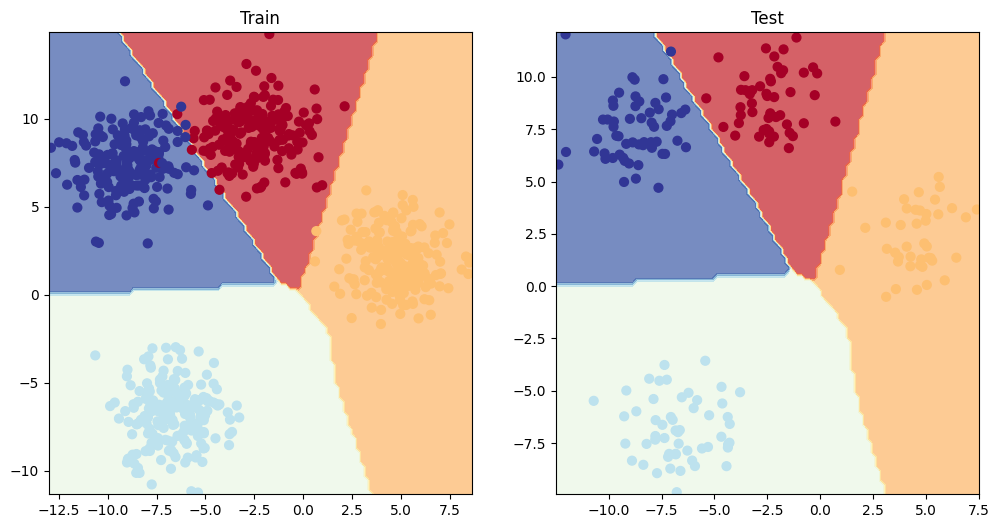

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
# Evaluation using torchmetrics
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)